In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
import time
from timeit import default_timer as timer
import calendar
import datetime as dt
from timeit import default_timer as timer

import numpy as np 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
data=pd.read_csv('df_clean (2).csv',index_col=0)

In [3]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [4]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip             object
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [5]:
data.Date = pd.to_datetime(data.Date)
data.Date.dtypes


dtype('<M8[ns]')

In [6]:
data.Cardnum = data.Cardnum.astype(str)

In [7]:
def leading_0(x):
    
    if '.0' in x:
        x = x[:-2]
        if len(x) == 5:
            return x
        else: 
            return '0'*(5-len(x)) + x
    else:
        return '0'*(5-len(x)) + x
data['Merch zip'] = data['Merch zip'].apply(leading_0)

In [8]:
data['Merch zip'] = data['Merch zip'].astype(str)
data['Merch description'] = data['Merch description'].str.replace(r'\s', '')

In [58]:
data['cardnum_merch'] = data['Cardnum'] + data['Merchnum']
data['cardnum_zip'] = data['Cardnum'] + data['Merch zip']
data['cardnum_state'] = data['Cardnum'] + data['Merch state']
data['merchnum_zip'] = data['Merchnum'] + data['Merch zip']
data['merchnum_state'] = data['Merchnum'] + data['Merch state']


data['cardnum_merchdes']=data['Cardnum']+data['Merch description']
data['merchdes_zip']=data['Merch description']+data['Merch zip']
data['merchdes_state']=data['Merch description']+data['Merch state']

In [59]:
data

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,cardnum_merch,cardnum_zip,cardnum_state,merchnum_zip,merchnum_state,cardnum_merchdes,merchdes_zip,merchdes_state
0,1,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,51421904395509006296254,514219043938118,5142190439TN,550900629625438118,5509006296254TN,5142190439FEDEXSHP12/23/09AB#,FEDEXSHP12/23/09AB#38118,FEDEXSHP12/23/09AB#TN
1,2,5142183973,2010-01-01,61003026333,SERVICEMERCHANDISE#81,MA,01803,P,31.42,0,514218397361003026333,514218397301803,5142183973MA,6100302633301803,61003026333MA,5142183973SERVICEMERCHANDISE#81,SERVICEMERCHANDISE#8101803,SERVICEMERCHANDISE#81MA
2,3,5142131721,2010-01-01,4503082993600,OFFICEDEPOT#191,MD,20706,P,178.49,0,51421317214503082993600,514213172120706,5142131721MD,450308299360020706,4503082993600MD,5142131721OFFICEDEPOT#191,OFFICEDEPOT#19120706,OFFICEDEPOT#191MD
3,4,5142148452,2010-01-01,5509006296254,FEDEXSHP12/28/09AB#,TN,38118,P,3.62,0,51421484525509006296254,514214845238118,5142148452TN,550900629625438118,5509006296254TN,5142148452FEDEXSHP12/28/09AB#,FEDEXSHP12/28/09AB#38118,FEDEXSHP12/28/09AB#TN
4,5,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,51421904395509006296254,514219043938118,5142190439TN,550900629625438118,5509006296254TN,5142190439FEDEXSHP12/23/09AB#,FEDEXSHP12/23/09AB#38118,FEDEXSHP12/23/09AB#TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BESTBUY00001610,KY,41042,P,84.79,0,51422760533500000006160,514227605341042,5142276053KY,350000000616041042,3500000006160KY,5142276053BESTBUY00001610,BESTBUY0000161041042,BESTBUY00001610KY
96393,96750,5142225701,2010-12-31,8090710030950,MARKUSOFFICESUPPLIES,OH,45248,P,118.75,0,51422257018090710030950,514222570145248,5142225701OH,809071003095045248,8090710030950OH,5142225701MARKUSOFFICESUPPLIES,MARKUSOFFICESUPPLIES45248,MARKUSOFFICESUPPLIESOH
96394,96751,5142226486,2010-12-31,4503057341100,"TECHPAC,INC",OH,45150,P,363.56,0,51422264864503057341100,514222648645150,5142226486OH,450305734110045150,4503057341100OH,"5142226486TECHPAC,INC","TECHPAC,INC45150","TECHPAC,INCOH"
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,94402,P,2202.03,0,51422446198834000695412,514224461994402,5142244619CA,883400069541294402,8834000695412CA,5142244619BUY.COM,BUY.COM94402,BUY.COMCA


In [60]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       'cardnum_merch', 'cardnum_zip', 'cardnum_state', 'merchnum_zip',
       'merchnum_state', 'cardnum_merchdes', 'merchdes_zip', 'merchdes_state'],
      dtype='object')

In [61]:
data.dtypes

Recnum                        int64
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
cardnum_merch                object
cardnum_zip                  object
cardnum_state                object
merchnum_zip                 object
merchnum_state               object
cardnum_merchdes             object
merchdes_zip                 object
merchdes_state               object
dtype: object

In [62]:
entities = list(data.iloc[:, np.r_[1, 3,4, 10:18]].columns)

In [63]:
entities

['Cardnum',
 'Merchnum',
 'Merch description',
 'cardnum_merch',
 'cardnum_zip',
 'cardnum_state',
 'merchnum_zip',
 'merchnum_state',
 'cardnum_merchdes',
 'merchdes_zip',
 'merchdes_state']

In [64]:
data.Date = pd.to_datetime(data.Date)

In [65]:
df1 = data.copy()
final = data.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum

In [66]:
start = timer()
for entity in entities:    
    st = timer()    
    ## Day-since variables:   
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)   
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since'] = final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')   
    ## Frequency & Amount variables:   
    for time in [0,1,3,7,14,30]:       
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]       
        col_name = entity + '_count_' + str(time)    
        mapper2 = temp2.groupby('Recnum')[entity].count()      
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')       
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/toal_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]
        print(f'Run time for entity {entity} ----------------- {timer() - st:0.2f}s')

print(f'Total run time: {(timer() - start) / 60:0.2f}min')


Cardnum_day_since ---> Done
Cardnum_count_0 ---> Done
Run time for entity Cardnum ----------------- 5.38s
Cardnum_count_1 ---> Done
Run time for entity Cardnum ----------------- 6.09s
Cardnum_count_3 ---> Done
Run time for entity Cardnum ----------------- 6.81s
Cardnum_count_7 ---> Done
Run time for entity Cardnum ----------------- 7.55s
Cardnum_count_14 ---> Done
Run time for entity Cardnum ----------------- 8.70s
Cardnum_count_30 ---> Done
Run time for entity Cardnum ----------------- 9.78s

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Run time for entity Merchnum ----------------- 236.09s
Merchnum_count_1 ---> Done
Run time for entity Merchnum ----------------- 240.06s
Merchnum_count_3 ---> Done
Run time for entity Merchnum ----------------- 245.60s
Merchnum_count_7 ---> Done
Run time for entity Merchnum ----------------- 252.81s
Merchnum_count_14 ---> Done
Run time for entity Merchnum ----------------- 261.79s
Merchnum_count_30 ---> Done
Run time for entity Merchnum ---

In [67]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merchdes_state_actual/toal_14,merchdes_state_count_30,merchdes_state_avg_30,merchdes_state_max_30,merchdes_state_med_30,merchdes_state_total_30,merchdes_state_actual/avg_30,merchdes_state_actual/max_30,merchdes_state_actual/med_30,merchdes_state_actual/toal_30
0,1,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,...,1.000000,1,3.620000,3.62,3.620,3.62,1.000000,1.000000,1.000000,1.000000
1,2,5142183973,2010-01-01,61003026333,SERVICEMERCHANDISE#81,MA,01803,P,31.42,0,...,1.000000,1,31.420000,31.42,31.420,31.42,1.000000,1.000000,1.000000,1.000000
2,3,5142131721,2010-01-01,4503082993600,OFFICEDEPOT#191,MD,20706,P,178.49,0,...,1.000000,1,178.490000,178.49,178.490,178.49,1.000000,1.000000,1.000000,1.000000
3,4,5142148452,2010-01-01,5509006296254,FEDEXSHP12/28/09AB#,TN,38118,P,3.62,0,...,1.000000,1,3.620000,3.62,3.620,3.62,1.000000,1.000000,1.000000,1.000000
4,5,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,...,0.500000,2,3.620000,3.62,3.620,7.24,1.000000,1.000000,1.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BESTBUY00001610,KY,41042,P,84.79,0,...,1.000000,1,84.790000,84.79,84.790,84.79,1.000000,1.000000,1.000000,1.000000
96393,96750,5142225701,2010-12-31,8090710030950,MARKUSOFFICESUPPLIES,OH,45248,P,118.75,0,...,0.073284,7,391.494286,1050.12,118.750,2740.46,0.303325,0.113082,1.000000,0.043332
96394,96751,5142226486,2010-12-31,4503057341100,"TECHPAC,INC",OH,45150,P,363.56,0,...,0.054392,20,1048.781500,2494.40,499.750,20975.63,0.346650,0.145750,0.727484,0.017332
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,94402,P,2202.03,0,...,0.236560,46,636.854348,2349.95,299.655,29295.30,3.457667,0.937054,7.348551,0.075167


In [68]:
start = timer()

for ent in entities:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] =\
            final[ent + '_count_' + d]*1.0/(final[ent + '_count_' + dd]*1.0/float(dd))
print(f'Total run time: {timer() - start:0.2f}s')

Total run time: 0.24s


In [69]:
final

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merchdes_zip_count_0_by_30,merchdes_zip_count_1_by_7,merchdes_zip_count_1_by_14,merchdes_zip_count_1_by_30,merchdes_state_count_0_by_7,merchdes_state_count_0_by_14,merchdes_state_count_0_by_30,merchdes_state_count_1_by_7,merchdes_state_count_1_by_14,merchdes_state_count_1_by_30
0,1,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,...,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000
1,2,5142183973,2010-01-01,61003026333,SERVICEMERCHANDISE#81,MA,01803,P,31.42,0,...,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000
2,3,5142131721,2010-01-01,4503082993600,OFFICEDEPOT#191,MD,20706,P,178.49,0,...,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000
3,4,5142148452,2010-01-01,5509006296254,FEDEXSHP12/28/09AB#,TN,38118,P,3.62,0,...,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000
4,5,5142190439,2010-01-01,5509006296254,FEDEXSHP12/23/09AB#,TN,38118,P,3.62,0,...,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96392,96749,5142276053,2010-12-31,3500000006160,BESTBUY00001610,KY,41042,P,84.79,0,...,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000,7.000000,14.000000,30.000000
96393,96750,5142225701,2010-12-31,8090710030950,MARKUSOFFICESUPPLIES,OH,45248,P,118.75,0,...,4.285714,7.000000,2.800000,4.285714,7.000000,2.800000,4.285714,7.000000,2.800000,4.285714
96394,96751,5142226486,2010-12-31,4503057341100,"TECHPAC,INC",OH,45150,P,363.56,0,...,6.000000,4.666667,8.000000,6.000000,4.666667,8.000000,6.000000,4.666667,8.000000,6.000000
96395,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,94402,P,2202.03,0,...,0.652174,4.666667,4.307692,2.608696,1.166667,1.076923,0.652174,4.666667,4.307692,2.608696


In [70]:
final.to_csv('final.csv')

In [11]:
data['dow'] = data.Date.apply(lambda x: calendar.day_name[x.weekday()])
train_test = data[data.Date < '2010-11-01']

In [13]:
# do statistical smoothing
c = 4; nmid = 20; y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('dow')['Fraud'].mean()
num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num - nmid)/c))
data['dow_risk'] = data.dow.map(y_dow_smooth)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df1=pd.DataFrame([['Monday',0.008711],['Tuesday',0.007127],['Wednesday',0.009788],['Thursday',0.018626],['Friday',0.025994],['Saturday',0.010095],['Sunday',0.00963]], columns=['dow', 'dow_risk'])
df1

,dow,dow_risk
0,Monday,0.008711
1,Tuesday,0.007127
2,Wednesday,0.009788
3,Thursday,0.018626
4,Friday,0.025994
5,Saturday,0.010095
6,Sunday,0.009630


In [36]:
df1['dow_risk'].mean()

0.012853

<Figure size 432x288 with 0 Axes>

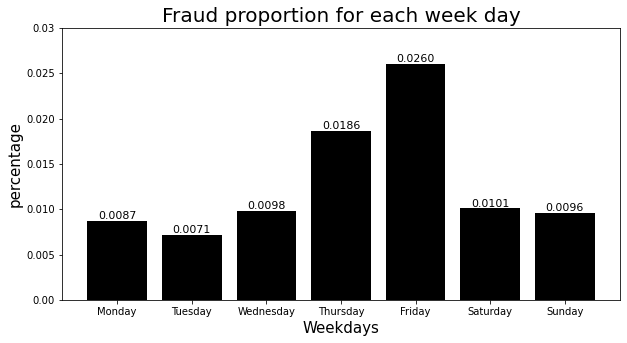

In [38]:
tickpositions=[0.00,0.005,0.010,0.015,0.020,0.025,0.03]
ticklabels=['0.00','0.005','0.010','0.015','0.020','0.025','0.03']
fig = plt.figure()
plt.figure(figsize=(10,5))
plt.bar(df1['dow'],df1['dow_risk'],color='black')
plt.xlabel('Weekdays',fontsize=15)
plt.ylabel('percentage',fontsize=15)
plt.title('Fraud proportion for each week day',fontsize=20)
#avg_percentage=df1['dow_risk'].mean()
#plt.axhline(y=avg_percentage,color='green',linestyle='--')
#plt.annotate('Avg.Fraud',(0,0.011),color='green',fontsize=12)


plt.ylim(0.0130, 0.0160)
plt.yticks(tickpositions,ticklabels)
for a,b in zip(df1['dow'],df1['dow_risk']):
    plt.text(a, b, '%.4f' % b, ha='center', va= 'bottom',fontsize=11)
plt.show()